In [79]:
import tensorflow as tf
import numpy as np

In [132]:
def f(x):
    return 3 * x
input = []
output = []
for x in range(1000):
    input.append(x)
    output.append(f(x))

In [138]:
# parameters
learning_rate = 0.001
epochs = 100
display_step = 5

In [134]:
train_X = np.asarray(input)
train_Y = np.asarray(output) 
n_samples = train_X.shape[0]

In [135]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [136]:
W = tf.Variable(tf.random_uniform((), -1, 1), name="weight")
b = tf.Variable(tf.random_uniform((), -1, 1), name="bias")
"""
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(W))
"""

'\ninit = tf.global_variables_initializer()\nwith tf.Session() as sess:\n    sess.run(init)\n    print(sess.run(W))\n'

In [137]:
pred = tf.add(tf.multiply(X, W), b)
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

Epoch: 0005 cost= 0.285982192 W= 2.99753 b= 1.486
Epoch: 0010 cost= 0.348196596 W= 2.99854 b= 1.4504
Epoch: 0015 cost= 0.257896543 W= 2.99876 b= 1.24353
Epoch: 0020 cost= 0.079715595 W= 2.99931 b= 0.691028
Epoch: 0025 cost= 0.006217648 W= 2.9998 b= 0.195326
Epoch: 0030 cost= 0.000514955 W= 3.0 b= -0.0336231
Epoch: 0035 cost= 0.000298386 W= 2.99998 b= -0.0131995
Epoch: 0040 cost= 0.001095463 W= 3.0001 b= -0.0861585
Epoch: 0045 cost= 0.000089276 W= 2.99998 b= 0.0219437
Epoch: 0050 cost= 0.000013066 W= 3.00001 b= -0.00203335
Epoch: 0055 cost= 0.001190965 W= 2.99996 b= -0.0293209
Epoch: 0060 cost= 0.003146859 W= 3.00004 b= -0.0963775
Epoch: 0065 cost= 0.000059311 W= 3.00001 b= -0.0133769
Epoch: 0070 cost= 0.000288855 W= 3.00007 b= -0.0227895
Epoch: 0075 cost= 0.000008233 W= 3.0 b= 0.00572663
Epoch: 0080 cost= 0.000027145 W= 3.00003 b= -0.0113902
Epoch: 0085 cost= 0.000030463 W= 3.00001 b= -0.0135402
Epoch: 0090 cost= 0.007057880 W= 3.00022 b= -0.0109904
Epoch: 0095 cost= 0.002762908 W= 2.9

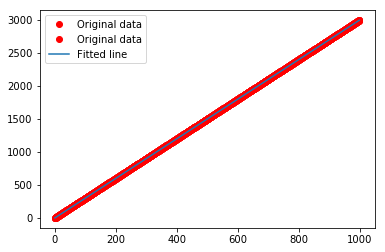

Testing... (Mean square loss Comparison)
Testing cost= 143.132
Absolute mean square loss difference: 143.053


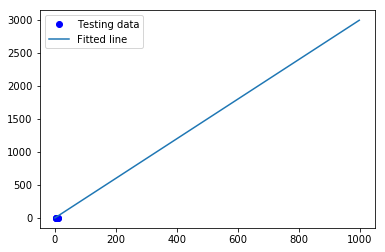

Optimization Finished!


In [141]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):

        for (x, y) in zip(train_X, train_Y):            
            sess.run(optimizer, feed_dict={X: x, Y: y})
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
        # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

print("Optimization Finished!")